In [2]:
import pandas as pd
df = pd.read_csv('Female1_Restraint_Fos_output.csv')
df.head()


,id,name,acronym,parent_structure_id,depth,count,volume (mm^3),density (cells/mm^3)
0,-1,background,bkd,-2.0,-1.0,911399.0,699.556516,1302.823974
1,0,left root,root-L,-1.0,0.0,3519593.0,250.985562,14023.089476
2,1,left Basic cell groups and regions,grey-L,0.0,1.0,3257448.0,224.592938,14503.786434
3,2,left Cerebrum,CH-L,1.0,2.0,2588307.0,137.893719,18770.303850
4,3,left Cerebral cortex,CTX-L,2.0,3.0,2365780.0,110.753453,21360.778678


In [5]:
left_df = df[df['name'].str.contains('left', case=False)]
right_df = df[df['name'].str.contains('right', case=False)]

right_df.head()

,id,name,acronym,parent_structure_id,depth,count,volume (mm^3),density (cells/mm^3)
839,10000,right root,root-R,-1.0,0.0,3744577.0,253.297922,14783.291439
840,10001,right Basic cell groups and regions,grey-R,10000.0,1.0,3469478.0,225.007922,15419.359332
841,10002,right Cerebrum,CH-R,10001.0,2.0,2903096.0,137.983016,21039.516979
842,10003,right Cerebral cortex,CTX-R,10002.0,3.0,2657789.0,110.796188,23988.090745
843,10004,right Cortical plate,CTXpl-R,10003.0,4.0,2603037.0,106.343437,24477.645835


In [6]:
left_summary = left_df['density (cells/mm^3)'].describe()
right_summary = right_df['density (cells/mm^3)'].describe()

print("Left brain summary:")
print(left_summary)
print("\nRight brain summary:")
print(right_summary)


Left brain summary:
count      838.000000
mean     15267.643017
std      11638.910855
min          0.000000
25%       6330.837618
50%      12490.306329
75%      21565.951120
max      96431.144519
Name: density (cells/mm^3), dtype: float64

Right brain summary:
count      839.000000
mean     15729.529021
std      12165.949740
min          0.000000
25%       6081.264624
50%      12726.408428
75%      22999.831981
max      74340.136054
Name: density (cells/mm^3), dtype: float64


/var/folders/3p/dpqvxtps4q12fqy1nb9k_vvc0000gq/T/ipykernel_14217/19385046.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['side'] = 'Left'
/var/folders/3p/dpqvxtps4q12fqy1nb9k_vvc0000gq/T/ipykernel_14217/19385046.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['side'] = 'Right'


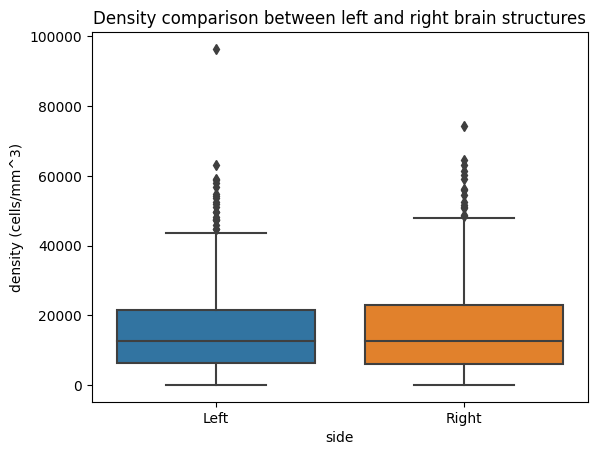

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the data and add a column indicating the side of the brain
left_df['side'] = 'Left'
right_df['side'] = 'Right'
combined_df = pd.concat([left_df, right_df], axis=0)

# Plot a boxplot or violin plot
sns.boxplot(x='side', y='density (cells/mm^3)', data=combined_df)
plt.title('Density comparison between left and right brain structures')
plt.show()


In [8]:
# Create new DataFrames to avoid modifying the original slices
left_df = left_df.copy()
right_df = right_df.copy()

# Add the 'side' column
left_df['side'] = 'Left'
right_df['side'] = 'Right'

# Combine the data
combined_df = pd.concat([left_df, right_df], axis=0)


In [9]:
combined_df.head()

,id,name,acronym,parent_structure_id,depth,count,volume (mm^3),density (cells/mm^3),side
1,0,left root,root-L,-1.0,0.0,3519593.0,250.985562,14023.089476,Left
2,1,left Basic cell groups and regions,grey-L,0.0,1.0,3257448.0,224.592938,14503.786434,Left
3,2,left Cerebrum,CH-L,1.0,2.0,2588307.0,137.893719,18770.303850,Left
4,3,left Cerebral cortex,CTX-L,2.0,3.0,2365780.0,110.753453,21360.778678,Left
5,4,left Cortical plate,CTXpl-L,3.0,4.0,2305744.0,106.300359,21690.839180,Left


In [10]:
# Find the outlier(s) in the left DataFrame
outliers = left_df[left_df['density (cells/mm^3)'] > left_summary['75%'] + 1.5 * (left_summary['75%'] - left_summary['25%'])]

print("Outliers:")
print(outliers)

Outliers:
       id                                               name     acronym   
66     89    left Primary somatosensory area, trunk, layer 4   SSp-tr4-L  \
85    108                      left Gustatory areas, layer 1       GU1-L   
86    109                    left Gustatory areas, layer 2/3     GU2/3-L   
102   125                 left Dorsal auditory area, layer 4     AUDd4-L   
109   139                left Primary auditory area, layer 4     AUDp4-L   
116   146              left Posterior auditory area, layer 4    AUDpo4-L   
131   167            left Anterolateral visual area, layer 4    VISal4-L   
144   180                left Lateral visual area, layer 2/3   VISl2/3-L   
152   188                  left Primary visual area, layer 4     VISp4-L   
172   208            left Laterointermediate area, layer 2/3  VISli2/3-L   
270   349                        left Anterior area, layer 4     VISa4-L   
277   356                   left Rostrolateral area, layer 4    VISrl4-L   
30

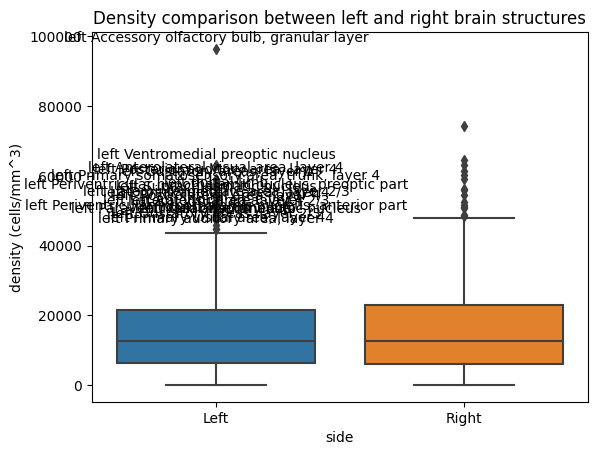

In [11]:
# Plot the boxplot with an annotation for the outlier
sns.boxplot(x='side', y='density (cells/mm^3)', data=combined_df)
plt.title('Density comparison between left and right brain structures')

# Annotate the outlier
for index, row in outliers.iterrows():
    plt.annotate(row['name'], (0, row['density (cells/mm^3)']), textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()


/var/folders/3p/dpqvxtps4q12fqy1nb9k_vvc0000gq/T/ipykernel_14217/166867728.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_interest['side'] = 'Left'
/var/folders/3p/dpqvxtps4q12fqy1nb9k_vvc0000gq/T/ipykernel_14217/166867728.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_interest['side'] = 'Right'


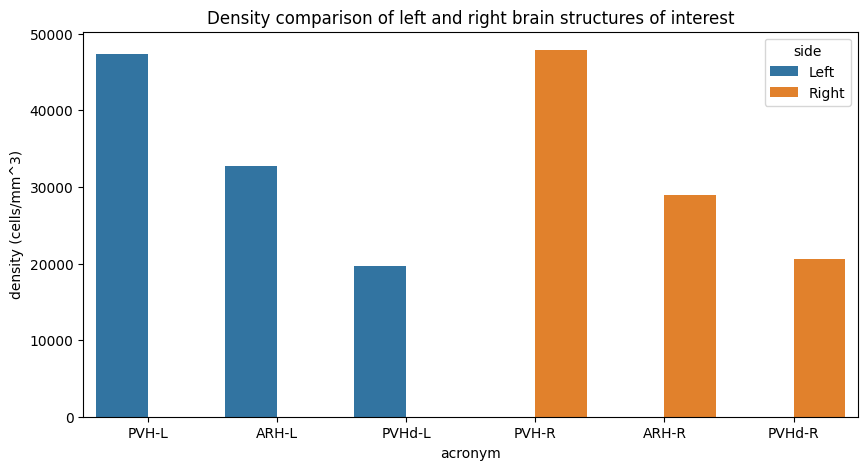

In [13]:
structures_of_interest = ['PVH', 'ARH']

left_interest = left_df[left_df['acronym'].str.contains('|'.join(structures_of_interest), case=False)]
right_interest = right_df[right_df['acronym'].str.contains('|'.join(structures_of_interest), case=False)]

left_interest['side'] = 'Left'
right_interest['side'] = 'Right'
combined_interest = pd.concat([left_interest, right_interest], axis=0)

plt.figure(figsize=(10, 5))
sns.barplot(x='acronym', y='density (cells/mm^3)', hue='side', data=combined_interest)
plt.title('Density comparison of left and right brain structures of interest')
plt.show()




In [14]:
combined_interest['side_acronym'] = combined_interest['side'] + ' ' + combined_interest['acronym']

sorted_combined_interest = combined_interest.sort_values(by=['acronym', 'side'])

custom_order = sorted_combined_interest['side_acronym'].unique()

<Figure size 1000x500 with 0 Axes>

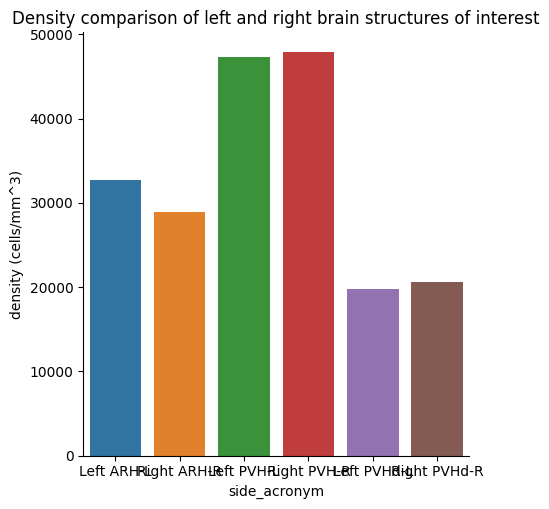

In [15]:
plt.figure(figsize=(10, 5))
sns.catplot(x='side_acronym', y='density (cells/mm^3)', kind='bar', data=sorted_combined_interest, order=custom_order)
plt.title('Density comparison of left and right brain structures of interest')
plt.show()


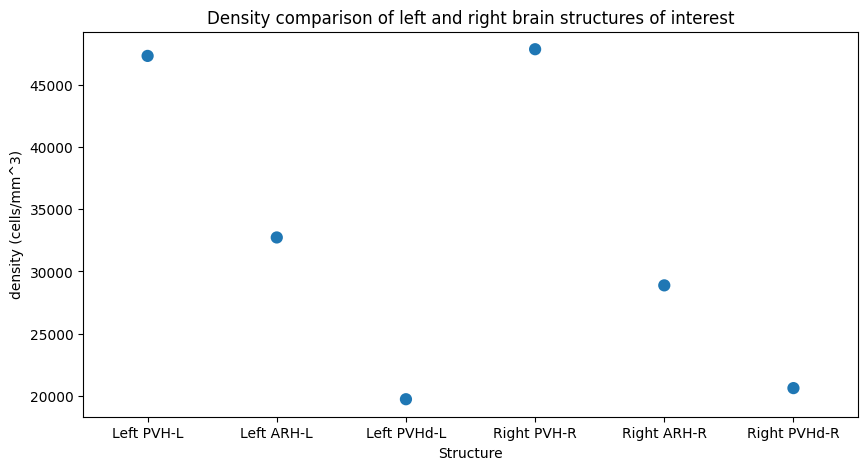

In [17]:
combined_interest['structure_side'] = combined_interest['side'] + ' ' + combined_interest['acronym']
plt.figure(figsize=(10, 5))
sns.pointplot(x='structure_side', y='density (cells/mm^3)', data=combined_interest, join=False)
plt.title('Density comparison of left and right brain structures of interest')
plt.xlabel('Structure')
plt.show()



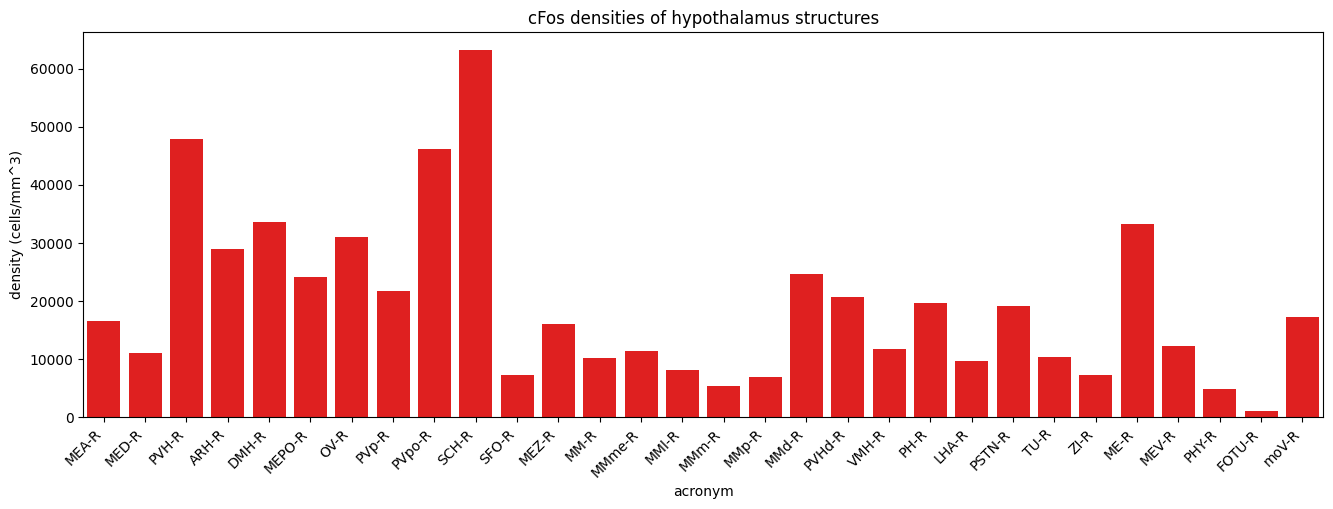

In [19]:
hypothalamus_structures = ['ARH', 'DMH', 'LHA', 'LPOE', 'ME', 'MEPO', 'MM', 'OV', 'PH', 'PSTN', 'PVH', 'PVp', 'SCH', 'SFO', 'TU', 'VMH', 'ZI']

right_hypothalamus = right_df[right_df['acronym'].str.contains('|'.join(hypothalamus_structures), case=False)]

plt.figure(figsize=(16, 5))
ax = sns.barplot(x='acronym', y='density (cells/mm^3)', data=right_hypothalamus, color='red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('cFos densities of hypothalamus structures')
plt.show()


In [20]:
right_df['acronym'] = right_df['acronym'].str.replace('-R', '')


In [21]:
right_hypothalamus = right_df[right_df['acronym'].str.contains('|'.join(hypothalamus_structures), case=False)]

In [25]:
cerebral_nuclei_structures = ['ACB', 'BST', 'CeA', 'LS', 'SF', 'GP', 'CP', 'NDB', 'SI']

right_cerebral_nuclei = right_df[right_df['acronym'].isin(cerebral_nuclei_structures)]


color_palette = {
    'ACB': (0, 114, 178),
    'BST': (255, 0, 0),
    'CeA': (0, 255, 0),
    'LS': (255, 255, 0),
    'SF': (0, 255, 255),
    'GP': (255, 0, 255),
    'CP': (128, 128, 128),
    'NDB': (0, 128, 128),
    'SI': (128, 0, 128),
}

color_palette = {k: tuple([c / 255 for c in v]) for k, v in color_palette.items()}


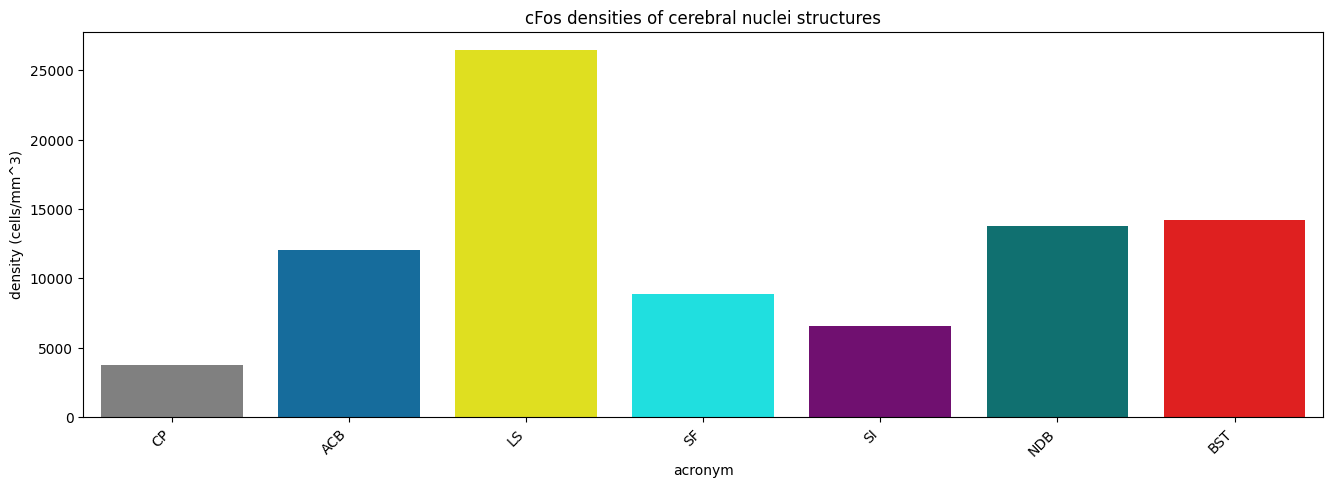

In [26]:
plt.figure(figsize=(16, 5))
ax = sns.barplot(x='acronym', y='density (cells/mm^3)', data=right_cerebral_nuclei, palette=color_palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('cFos densities of cerebral nuclei structures')
plt.show()


In [2]:
cerebral_nuclei_structures = ['ACB', 'BST', 'CeA', 'LS', 'SF', 'GP', 'CP', 'NDB', 'SI']
right_hypothalamus = right_df[right_df['acronym'].str.contains('|'.join(hypothalamus_structures), case=False)]
right_cerebral_nuclei = right_df[right_df['acronym'].isin(cerebral_nuclei_structures)]

right_hypothalamus['category'] = 'hypothalamus'
right_cerebral_nuclei['category'] = 'cerebral_nuclei'

combined_data = pd.concat([right_hypothalamus, right_cerebral_nuclei])

def custom_color(acronym):
    if acronym in hypothalamus_structures:
        return 'red'
    else:
        return 'babyblue'
    
combined_data['color'] = combined_data['acronym'].apply(custom_color)

plt.figure(figsize=(20, 5))
ax = sns.barplot(x='acronym', y='density (cells/mm^3)', data=combined_data, hue='category', palette='husl', dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('cFos densities of hypothalamus and cerebral nuclei structures')
plt.show()


NameError: name 'right_df' is not defined

In [11]:
my_dict = {"1AA397": "VISmmp2/3", "1AA396": "VISm6a", "228A5C": "ORBvl", "228A5D": "ORBl5", "228A5E": "ORB6b", "0A858B": "VISli", "0A858C": "VISp", "0A858A": "VISli2/3", "1AA398": "VISmma4", "24895C": "ORBm2", "15B0B2": "TEa4", "15B0B3": "TEa1", "FF5346": "MPO", "FF5347": "SFO", "24895D": "ORBl6a", "24895E": "ORB5", "CACCCA": "im", "FDFB8E": "CUL4pu", "CACCCC": "mtc", "CACCCB": "opt", "FD5D4F": "NC", "FF8F9C": "MDl", "FDAE6D": "PBle", "019EAB": "VISa5", "019EAC": "VISa4", "FCFA8F": "NODmo", "197C63": "SSp-ll5", "15AFB3": "TEa5", "A8A9AA": "V3", "32B724": "ENTl4", "32B725": "ENTl3", "32B722": "ENTl1", "32B723": "ENTmv4", "CBC8C9": "vc", "C8CCC8": "cte", "C8CCC9": "mfsbshy", "CBCBC9": "stf", "CBCBC8": "per", "A0EE9C": "EPd", "FDFB8F": "SIM", "1B7E63": "SSp-m5", "7CD049": "DGcr-sg", "53BF93": "AONl", "FFB1D6": "MDRNv", "CBCBC7": "aco", "53BF94": "AON2", "FE5B50": "SO", "16B0B3": "TEa", "7CD04A": "CA3so", "7CD04B": "DG-sgz", "187C62": "VISrll4", "CBCBCC": "mlf", "CBCBCB": "mfbsm", "CBCBCA": "pap", "FFC394": "CSl", "FFC393": "CS", "1B7F63": "SSp4", "FF5D50": "PVa", "FE4A3D": "MPNc", "61E7B7": "COAa1", "61E7B6": "COAa2", "61E7B5": "COApm3", "FFB984": "PDTg", "08828B": "VISl4", "12AD83": "VISC1", "CACCC9": "tct", "CACCC8": "ml", "FF4C3B": "VMHdm", "FF4C3C": "MEZ", "FF4C3D": "PVHd", "FF4C3E": "TMv", "62D09D": "TTd4", "187C64": "SSp-tr1", "FDFA91": "CENT2", "CACCC7": "cing", "197E62": "SSp-n5", "197E63": "SSp-n1", "0A8589": "VISpm1", "197E64": "SSp-ul1", "C7C8CA": "fx", "FF5345": "PSCH", "C8C8CC": "tspc", "1C8063": "SSs5", "FFAC6D": "P-sen", "FFAC6E": "PBld", "FFAC6F": "NLL", "C8C8CB": "rust", "FF5C50": "PVHam", "C7C8CC": "alv", "C7CBC8": "pmx", "C8C7CB": "mfbse", "CBCCCC": "lab", "088589": "VISpm6b", "088588": "VISal4", "FD90FE": "AT", "FD90FD": "SCig-b", "FD90FF": "IV", "23885C": "ORBvl5", "197F64": "SSp-bfd", "FEFC90": "LINGpu", "188060": "SSp-bfd1", "197F61": "SSp-ul2/3", "B3BEDE": "BSTd", "197F63": "SSp-ll", "197F62": "SSp-ll6b", "FE5D4F": "PVHmm", "FCFB91": "DECpu", "FDFB91": "CENT", "FE5D4E": "ASO", "A0EE9D": "EP", "C7C9C9": "py", "AAA9A9": "icf", "FDA5D2": "SPVI", "FDA5D0": "CU", "FFA5D1": "SPVOmdmd", "9DE69C": "BLAp", "FD4A3D": "Mmd", "188064": "SSp-m6b", "A9A8A8": "ri", "59B946": "PRE2", "CBCCC7": "IIn", "CAC9CC": "cuf", "CAC9CB": "oct", "CAC9CA": "dlf", "A2B1D7": "SI", "B3C0DF": "BAC", "B3C0DD": "BSTv", "B3C0DE": "BST", "84EA80": "BMAa", "84EA81": "BMA", "1B7D63": "VISrll1", "CAC9C7": "vlt", "7FBFE2": "MEApd", "80CDF8": "ACB", "7FCDF8": "OT3", "7FBFE1": "MEApd-a", "FD4A3E": "VMHc", "FEAD6E": "KF", "80CDF7": "OT1-3", "A9A8A9": "IPF", "5FE7B7": "COApm1-3", "5FE7B6": "COAp", "32B825": "ENTl2", "32B824": "ENTl6a", "8FCAED": "SH", "80C0E0": "MEApd-b", "80C0E1": "sAMY", "80C0E2": "AAA", "32B822": "ENT", "C7C9CA": "cc", "C7C9CC": "mtt", "1A7D64": "SSp-un", "1A7D63": "SSp-un6b", "1A7D62": "SSp-bfd5", "FCFA91": "ANcr2", "FCFA90": "CUL4, 5pu", "FF9B88": "P", "FE5347": "DMHp", "FDB3D6": "SUV", "7DCF49": "DG", "EBE654": "CENT2gr", "08858C": "VISp6a", "08858B": "VISpm2/3", "08858A": "VISp6b", "B2BFDE": "BSTmg", "59D9AB": "PAA2", "15AFB2": "TEa6a", "039297": "AUDp", "1C7F63": "SSp-un2/3", "ECE652": "PFLgr", "84E981": "BMAp", "AAA9AA": "nf", "40A664": "ACAv1", "C8C8C8": "mtg", "FEB886": "P5", "A7AAAA": "ppf", "C9CBCA": "rct", "019197": "AUDpo5", "48C73C": "POST1", "8ADA86": "CLA", "8ADA87": "6b", "1B8064": "SS5", "A3DAA3": "DP", "31B623": "ENTm", "FEA3D1": "NTSge", "31B625": "ENTm1", "7CCF49": "DGmb", "FEA3D2": "NTB", "56B84A": "ProSv-sp", "FEB2D7": "MY-mot", "56B84B": "ProSd-sp", "FD5447": "OV", "FD5446": "PS", "70FF70": "CTXpl", "70FF71": "Isocortex", "FD909C": "PR", "FEB2D9": "PHY", "FD909E": "AV", "FD909F": "RE", "0A838C": "VIS6a", "0C858B": "VISpor6a", "80CBF8": "LSS", "FDB1D7": "MDRNd", "0B838A": "VISpor5", "029EAC": "VISrl2/3", "2EA850": "PL2", "30B824": "ENTm2", "FDB1D8": "DMX", "FDFC8E": "ANcr1mo", "7ECDF8": "FS", "FDFC8F": "NOD", "53BE93": "AONpv", "198064": "SS4", "039298": "AUDpo4", "198062": "SSs", "198063": "SSp", "53BE94": "AONm", "198061": "SSp6b", "FF909C": "MED", "FF909F": "PT", "3FA564": "ACA2/3", "FFC294": "RPO", "3FA566": "ACAv2/3", "FFB1D9": "NR", "FFB1D8": "LIN", "FFC295": "PRNr", "7DCF4A": "CA2slm", "7DCF4B": "CA2", "C8CAC7": "ts", "C7CCC8": "step", "187E60": "VISrll2/3", "FFB1D7": "ACVI", "95E3C8": "NLOT2", "FEFA8F": "CUL5", "FC4C3E": "PMd", "C8CBCB": "hht", "C9C8C8": "bic", "7CCF4B": "CA3sr", "7CCF4A": "DGcr-mo", "A8AAAA": "VL", "60E7B6": "COApl3", "60E7B7": "COApl1", "C7C8CB": "cpt", "60E7B5": "COA", "0A848A": "VISli5", "FFA5D0": "AP", "AAA9A8": "RC", "FFA5D2": "SPVOrdm", "3EA665": "ACAd1", "187E61": "SSp-m1", "A7AAA9": "c", "ECE754": "CUL4gr", "40A566": "ACAv", "1CA496": "VISm4", "40A564": "ACAv6a", "40A565": "ACAd2/3", "AAA9A7": "V4", "7DCE4B": "CA3slu", "72D469": "PAR1", "16B0B2": "TEa6b", "1DA598": "VISmmp6b", "CCC7CC": "dscp", "C8C7CC": "cst", "FF5B50": "PVHpv", "7DCD4B": "HPF", "1AA495": "VISm5", "A9AAA9": "apf", "A9AAA8": "chpl", "C9CBCB": "csc", "C9CBCC": "svp", "FF8081": "VP", "82C6AE": "MOBmi", "7DCE4A": "DGcr", "CCCAC7": "cpd", "A2B0D8": "PALv", "CAC8C9": "von", "209765": "AId2/3", "71D569": "PAR2", "1CA498": "VISmma1", "A9AAA7": "V4r", "0B848A": "VISam2/3", "0B848B": "VISp4", "019397": "AUDv6a", "FFC195": "P-sat", "40A466": "ACA5", "7CCE4B": "DGlb", "FE7E84": "DORsm", "09848C": "VISpl2/3", "09848B": "VISam1", "FF79FF": "SCs", "FEFA91": "LING", "99D2BD": "OLF", "11AD83": "VISC", "11AD82": "VISC6b", "58BA48": "ProSd-m", "C8CCCA": "pvbt", "1E9D5A": "MOp1", "C9C7CA": "VIIIn", "FFC395": "CSm", "C9C7CC": "pyd", "FE4B3C": "PVHmpv", "48C83B": "POST2", "48C83C": "POST3", "62CE9F": "TTv1", "C8CCCC": "cct", "C9C7C9": "ccb", "C8C9C8": "IVn", "30B723": "ENTmv", "1B7F62": "SSp-m4", "C8C9C9": "vhc", "019B75": "GU", "FF7F83": "MG", "0B848C": "VISal6b", "FF7F84": "SPFm", "11AC83": "VISC6a", "FFC6E2": "RPA", "FC8F9F": "Xi", "FFC6E1": "MY-sat", "FE8DFF": "VTA", "FE8DFE": "Pa4", "7CCE4A": "DGmb-mo", "A8A9A8": "pce", "FD5C50": "PVHpml", "40A465": "ACAv6b", "A8A9A9": "pcf", "A9AAAA": "sif", "C9CBC9": "jrb", "24875E": "ORBm6b", "7DCE49": "DGlb-sg", "268F44": "FRP", "FE8083": "LGd-sh", "FE8082": "VPMpc", "FFFB8F": "DECmo", "FE8084": "SPFp", "0D9E90": "ECT5", "FF79FE": "MEV", "CBCCCB": "mfb", "2FA850": "PL6a", "7ECF48": "DGmb-sg", "9AD2BD": "MOBipl", "09818C": "VISpor1", "FE4B3D": "PVHf", "FE4B3E": "PVHdp", "FE4B3B": "PVHlp", "B1C0DE": "BSTse", "B1C0DF": "BSTov", "9AD2BC": "MOBopl", "2FA74F": "PL2/3", "FE7AFF": "MBsen", "FE4C3E": "AHNc", "FE4C3D": "MBO", "FE4C3C": "AHNa", "FE4C3B": "SUMl", "80BFE1": "MEA", "80BFE0": "CEAc", "FF8EFC": "MRNm", "80BFE2": "BA", "FF8EFE": "PN", "FF8EFD": "SCig-a", "FF8EFF": "DT", "FFFB8D": "PYRmo", "FF6F80": "TH", "FF78FE": "SCO", "FEF98F": "CENT2mo", "1A7E61": "SSp-bfd6b", "049399": "AUDd", "049398": "VISlla2/3", "CAC8CB": "cbp", "CAC8CC": "XIn", "A8EBD2": "TR3", "CAC8CA": "drt", "FE8EFF": "APN", "FF7AFE": "SAG", "FF7AFF": "IC", "FE8EFE": "MBmot", "FD5D50": "PVi", "009FAA": "PTLp6b", "009FAB": "VISa", "009FAC": "PTLp", "F2483B": "RCH", "6ACABA": "PIR2", "FEA5D0": "CN", "CCCAC9": "sup", "CCCAC8": "mp", "12AC83": "VISC2/3", "FD8F9E": "SubG", "FD8F9D": "CL", "F24839": "TU", "019C75": "GU5", "CCCACA": "pc", "1D9D5A": "MOp6b", "CCCACC": "sct", "CCCACB": "nst", "FF5545": "SCH", "FF5546": "AHA", "FF5547": "ADP", "CBC8CA": "cbc", "FFAE6D": "SOC", "CBC8CC": "df", "CBC8CB": "fi", "CAC8C8": "grf", "FF7080": "BS", "CAC8C7": "lot", "FC8FFF": "PAG", "69CBBA": "PIR3", "90CAED": "LSr", "1BA498": "RSPv5", "EBE554": "CUL5gr", "90CAEC": "LSX", "FEFA8E": "ANcr2mo", "1BA497": "RSPagl", "8AD987": "CTXsp", "C9C8C9": "iVIIn", "FDAD6E": "PBmv", "7ECD4A": "FC", "FDAD6F": "PBlv", "FEB984": "I5", "C7C9CB": "Xn", "4BB547": "SUBd-sp", "FFF890": "CUL5pu", "C9C7CB": "dtt", "FD8082": "LGd-ip", "FD8DFF": "RPF", "30B724": "ENTm5", "0A828A": "VISpor4", "F2463B": "A13", "30B725": "ENTm5/6", "B2BEDE": "BSTif", "C7CBCB": "bsc", "B2BEDF": "BSTtr", "C8C9CB": "amc", "C8C9CC": "supd", "C8C9CA": "fp", "FF8082": "VENT", "FF8083": "SPF", "FCB3D8": "PGRNd", "4FC244": "SUB", "4FC243": "SUBd", "C8C8C9": "fxpo", "FF8084": "LGd", "1A7C64": "VISrll6a", "1BA595": "VISm", "95E4C7": "NLOT1", "FFA3D1": "CNspg", "FE90FD": "RN", "FE90FE": "PRC", "FE90FF": "III", "FD4C3E": "MPN", "FFB0D8": "PGRN", "FFB0D9": "x", "1CA497": "VISmma6b", "09838C": "VISal", "FEFC8F": "UVUpu", "FFFB8E": "PRM", "FEFB8E": "SIMmo", "197E61": "SSp-un4", "FE7F82": "MGd", "0E9F91": "ECT6a", "0E9F90": "ECT6b", "FDA6FF": "DR", "0D9E91": "ECT", "FEFB8F": "CUL", "A7ECD3": "TR2", "C9C9CC": "hc", "FF707F": "IB", "FDA3D1": "Pa5", "94E4C7": "NLOT3", "0A838A": "VISpl1", "FDF990": "PRMpu", "187D61": "SSp-m6a", "1A8064": "SSp-n", "94E4C8": "NLOT1-3", "1A8062": "SSp-n4", "1A8063": "SSp-tr6b", "1A8060": "VISrll5", "1A8061": "SSs6b", "7BD04A": "DG-mo", "CBCACA": "rstm", "CBCACB": "VIn", "CBCACC": "och", "238A5E": "ORBl2/3", "238A5D": "ORBl1", "95E3C7": "NLOT", "62CF9F": "TT", "098489": "VIS", "238A5C": "ORBvl6a", "62CF9E": "TTv", "FFFDBB": "DN", "FFFDBC": "IP", "61D09E": "TTd1", "FF7F82": "VPLpc", "FE7E83": "MGv", "58B263": "ILA6b", "FF5D4E": "PVHpm", "A8A8A9": "psf", "FF5D4F": "PVH", "F1483A": "PSTN", "F1483B": "LZ", "197D61": "SSp-ul6a", "FDFA8F": "FOTUpu", "6ACAB9": "PIR", "029296": "VISlla5", "FFFCBC": "FN", "1E9C58": "MOs6b", "7FCCF8": "OT1", "FE5C50": "PVHmpd", "088489": "VISpm5", "FF9BCD": "MY", "FE909C": "DORpm", "2FB825": "ENTl2/3", "FE909E": "AM", "FE909D": "LP", "47C83C": "POST", "FE909F": "IMD", "FDFA8E": "COPYmo", "CCC7CA": "cett", "7FCCF7": "OT", "F2483A": "LHA", "FE493E": "SUMm", "6ACBBA": "PIR1-3", "AAA7AA": "hf", "FD8E9F": "SMT", "C8CCC7": "hbc", "FD8E9D": "GENv", "FD8E9E": "CM", "FE5D50": "PVHap", "9DEFD2": "AOBmi", "209666": "AId6a", "FEA4D2": "VCO", "3EA566": "ACAd5", "FEA4D0": "NTSco", "FEA4D1": "CNlam", "FF7AFD": "SCzo", "FCFB90": "CUL4, 5", "F1473B": "STN", "F1473A": "ME", "A4DAA3": "DP2/3", "61D09F": "TTd", "4EC144": "SUBv-sr", "A4DAA4": "DP6a", "C7CCCA": "lfbs", "AAA7A9": "rf", "4FC144": "SUBv", "FCB3D7": "LRNm", "0E9583": "PERI2/3", "FD8083": "GENd", "FD8084": "VPL", "0E9584": "PERI1", "4FC143": "SUBd-sr", "A4D9A3": "DP5", "08838A": "VISam6b", "6ACBB9": "PIR1", "A4D9A4": "DP1", "1AA496": "RSPagl2/3", "CAC7C9": "vrt", "1CA596": "VISmma6a", "08848B": "VISal5", "08848C": "VISl6a", "209665": "AId5", "08848A": "VISpl6b", "7FBEE2": "MEApv", "C9CBC8": "sst", "CBC8C8": "tspd", "FD8FFD": "ND", "FD8FFE": "MBsta", "FD8FFF": "RR", "1F9766": "AId6b", "61E6B6": "COApl2", "61E6B7": "COAa3", "FEFB90": "PYRpu", "FEFB91": "CUL4, 5mo", "62CF9D": "TTv3", "FDA5D1": "NTS", "FEB986": "V", "B3BEDF": "BSTju", "AAAAA7": "eg", "FEB985": "DTN", "AAAAA9": "plf", "AAAAA8": "pfs", "C8CBC7": "st", "019296": "AUDv", "CBC8C7": "ccr", "1AA595": "VISmmp1", "019DAC": "PTLp5", "F0483B": "ZI", "1BA397": "VISm1", "7ECE4B": "CA2sr", "AAA8AA": "VS", "FD8EFE": "SNl", "7ECE4A": "DG-po", "FCB1D9": "VNC", "029EAB": "VISrl6a", "CCC9C8": "sm", "2FA84F": "PL6b", "FF8D9E": "MDm", "FF8D9D": "POL", "57B947": "ProS", "FF8D9F": "MH", "B3BFDF": "BSTa", "B3BFDE": "BSTam", "B3BFDD": "BSTrh", "CACBCA": "rrt", "CACBCB": "pvbh", "CACBCC": "ptf", "FFA4FF": "CLI", "FFA4FE": "IPR", "F2473A": "PST", "F2473B": "LPO", "049299": "VISlla4", "C8CACB": "epsc", "C8CACC": "PIS", "B0F0FF": "CH", "C8CACA": "sptV", "C7CCCC": "IIIn", "1C7F64": "SSp-ll4", "FD5546": "DMHv", "FF5B4F": "ARH", "C7CCCB": "apd", "FFFB91": "ANcr1pu", "FFFB90": "PFLmo", "FE7AFE": "ICc", "FDAE6F": "PBlc", "FDB2D7": "y", "CACBC7": "eps", "F24739": "FF", "009B75": "GU2/3", "C8CAC8": "rst", "65A83D": "DG-sg", "CACBC8": "fxprg", "CACBC9": "vtd", "ECE553": "DECgr", "019C74": "GU6b", "66A83D": "CA1sp", "FF8E9D": "SGN", "66A83C": "CA2sp", "FE7AFD": "NB", "039198": "AUDp6b", "0B838B": "VISal1", "96A7D3": "MS", "96A7D2": "TRS", "000000": "root", "039199": "AUDp5", "FFFA90": "NODpu", "FFFA91": "VERM", "ECE654": "CENT3gr", "AAA8A9": "SEZ", "7ECE49": "DGcr-po", "AAAAAA": "sec", "58B362": "ILA6a", "FD4C3D": "AHNp", "FFA4D2": "SPVOmdmv", "1DA697": "VISmmp6a", "1AA698": "RSP", "FFBA84": "PCG", "187F60": "SSp-ll1", "187F61": "SS6a", "187F62": "SSp-tr", "187F63": "SSp-bfd2/3", "187F64": "SSp-ll2/3", "EBE653": "ANcr2gr", "CAC7CC": "fa", "FEBA85": "TRN", "F2463A": "PeF", "C9CACC": "ttp", "C9CACB": "vVIIIn", "C9CACA": "sctd", "FF8FFF": "SCdg", "54BF93": "AON1", "FF8FFD": "MRN", "FF8FFE": "SCdw", "FE4A3E": "AHNd", "FF8FFC": "NOT", "54BF94": "AON", "08828C": "VISli4", "C7CAC8": "stc", "FEB3D6": "AMBd", "FEB3D7": "LAV", "1E9D58": "MOs2/3", "80CDF6": "islm", "C8C8CA": "mtV", "C7CBC9": "snp", "FF8DFD": "SNr", "FF8DFE": "NPC", "FF8DFF": "MRNmg", "EBE652": "UVUgr", "FEB3D8": "AMBv", "FEB3D9": "AMB", "9AD1BD": "MOB", "09858B": "VISpm6a", "09858C": "VISl6b", "09858A": "VISam4", "FDB3D7": "EV", "FE5346": "PD", "FDB3D9": "PPYd", "FDB3D8": "LRN", "FF4A3D": "VMH", "FF4A3E": "MM", "7ECF4A": "CA1so", "FF4A3C": "MPNm", "7ECF4B": "CA1", "0A848B": "VISam5", "33B932": "APr", "1E9D59": "MO6a", "029FAB": "VISrl1", "029FAC": "VISa6b", "CBCAC8": "ctb", "C8CBCA": "pm", "4BB546": "SUBv-sp", "C8CBCC": "ec", "187E64": "SSp2/3", "187E63": "SSp-ul", "187E62": "SSp-ul5", "A8ECD3": "TR1-3", "A8ECD2": "TR", "C8CBC9": "tsp", "ECE753": "ANcr1gr", "72D568": "PAR", "72D569": "PAR3", "C9C8CB": "aot", "C9C8CC": "supa", "FFF891": "FLpu", "C9C8CA": "ee", "FFB885": "PG", "FEB1D7": "XII", "0D9F90": "ECT1", "97EC93": "PA", "A2B1D8": "MA", "FFC5E2": "RM", "7ECF49": "CA3", "57BA48": "Prosv-sr", "B1BFDF": "PALc", "1A7E62": "SSs1", "1A7E63": "SS2/3", "098588": "VISpor", "098589": "VISp1", "029099": "VISlla", "1B8063": "SSs2/3", "7EC0E2": "CEA", "ECE752": "PYRgr", "FFAE6F": "PSV", "54BE93": "AONe", "FFAE6E": "NLLd", "019099": "AUDv1", "54BE94": "AONd", "E64438": "HY", "FFA3D2": "MY-sen", "C7CBCC": "lfbst", "FFA3D0": "NTSm", "2FA750": "PL1", "C9CAC7": "aolt", "FEFC8E": "SIMpu", "61E5B7": "COApl1-3", "61E5B6": "COApm1-2", "C8CCCB": "dl", "0F9684": "PERI5", "CBC7C8": "ias", "FFB3D6": "VII", "59DAAB": "PAA1-3", "C9CAC9": "phpl", "59DAAA": "PAA1", "FFA5FF": "RAmb", "FFA5FD": "PPN", "FFA5FE": "IPC", "0F9683": "PERI", "80BEE2": "IA", "4EC244": "SUBd-m", "80BEE1": "CEAl", "FFAD6F": "NLLh", "FFAD6E": "SOCm", "FFAD6D": "PB", "1CA597": "RSPagl6a", "FEAC6F": "PBls", "FEAC6E": "PBmm", "4EC243": "SUBv-m", "CAC7CA": "mfbst", "019297": "VISlla6b", "CAC7CB": "fiber tracts", "019299": "AUD", "019298": "AUDp2/3", "1CA598": "RSPd", "FE79FF": "ICd", "FE79FE": "ICe", "FF8E9C": "PO", "7ED04B": "IG", "FF8E9E": "RH", "FF8E9F": "LGv", "7ED04A": "CA", "FFBA85": "LTN", "58B363": "ILA2", "CCC9C7": "fxs", "FFBA86": "B", "F0F080": "CB", "CAC9C9": "phpd", "FEAD6D": "PBme", "019198": "AUDv6b", "019199": "VISlla6a", "7DD04B": "CA1slm", "7DD04A": "CA1sr", "7FCDF7": "STRv", "FEAD6F": "POR", "FD4B3C": "PH", "09848A": "VISl1", "3FA666": "ACA6a", "32B524": "ENTmv5/6", "3FA664": "ACAd6a", "3FA665": "ACA6b", "60D09F": "TTv2", "90CBED": "LS", "FFFC90": "CENT3pu", "FFFC91": "LINGmo", "90CBEC": "LSc", "7DD048": "HIP", "187C63": "SSs4", "FFB886": "P-mot", "7DD049": "CA3slm", "268E44": "FRP6a", "FF79FD": "PBG", "1DA698": "VISmmp", "CAC9C8": "cVIIIn", "CCC9CA": "tp", "CCC9CC": "rstl", "CCC9CB": "phpm", "FE8D9F": "PCN", "58DAAB": "PAA3", "FE8D9D": "IntG", "FE8D9E": "PIL", "EAE753": "FOTUgr", "0D9F91": "ECT2/3", "FF64FF": "MB", "C7CBCA": "onl", "FC909D": "AMv", "CAC7C8": "ab", "FFB0D7": "MV", "EAE654": "SIMgr", "197D64": "SSp1", "197D63": "SSs6a", "197D62": "SSp-un5", "FD90FC": "Su3", "029396": "AUDpo", "11AC82": "VISC4", "61E6B5": "COApl1-2", "96A6D2": "MSC", "96A6D3": "NDB", "23895E": "ORB6a", "23895D": "ORBm1", "90EB8D": "LA", "32B823": "ENTmv2", "23895C": "ORB", "1F9B5A": "MOp6a", "B2C0DF": "BSTp", "B2C0DE": "BSTdm", "B2C0DD": "BSTpr", "FCFB8F": "COPYpu", "CCC8C8": "cstu", "CCC8C9": "IXn", "9DE79B": "BLAa", "9DE79C": "BLA", "2EA750": "PL", "A8EBD3": "TR1", "1A7F61": "SSp-un6a", "1A7F63": "SSp-ul4", "1A7F62": "SS1", "FE5547": "PVpo", "FE5546": "VLPO", "31B824": "ENTl5", "31B825": "ENTl6b", "FE5C4E": "PVHpmm", "31B823": "ENTm2b", "FE5C4F": "PVHp", "FD7F84": "PP", "FD7F83": "MGm", "FE8EFD": "MRNp", "C7CAC9": "fr", "3FA466": "ACAd6b", "FF4B3B": "PMv", "7ED048": "DGlb-mo", "FEF891": "CENT2pu", "FF5C4F": "PVHm", "FE8FFC": "EW", "7ED049": "CA2so", "FE8FFE": "LT", "FE8FFD": "SCm", "FE8FFF": "MT", "FDF98F": "CENT3mo", "FFF990": "COPY", "FFF991": "CUL4", "FEAE6E": "SOCl", "FEAE6D": "PBl", "FEAE6F": "NLLv", "FF7E82": "PoT", "FF7E83": "VPM", "FDA3D2": "DCN", "C9CAC8": "cbf", "1AA695": "VISmma2/3", "FF7E84": "VM", "FFA6FD": "SNc", "EAE754": "COPYgr", "FD8D9F": "AMd", "FD8D9E": "REth", "FEA5D2": "SPVOvl", "FE8E9D": "MTN", "FEA5D1": "DCO", "A9A7AA": "pri", "209764": "AId1", "CCC8CA": "ar", "CCC8CB": "dc", "CCC8CC": "mct", "1F9B59": "MO6b", "22885E": "ORBm6a", "1BA398": "VISmmp5", "FCFC91": "AN", "FFFA8E": "CBXmo", "24885E": "ORB2/3", "24885D": "ORBm2/3", "24885C": "ORBv", "FF78FF": "SCsg", "57B948": "ProSd-sr", "FD8EFF": "SCig-c", "197F60": "SSp-tr5", "FF9B87": "HB", "B0FFB8": "CTX", "FD8EFD": "PRT", "019FAA": "PTLp4", "FEFC91": "PRMmo", "019FAC": "VISa1", "019FAB": "PTLp6a", "0A848C": "VISl", "9DF0D2": "AOB", "9DF0D1": "AOBgl", "FD8F9F": "RT", "019398": "AUDd6b", "019399": "AUDd6a", "31B725": "ENTmv1", "31B724": "ENTl4/5", "019396": "AUDp6a", "66A73D": "CA3sp", "088389": "VISp5", "A9A8AA": "chfl", "31B723": "ENTm3", "1D9C5A": "MOs6a", "B2BFDF": "BSTfu", "CBC9C8": "uf", "CBC9C9": "cic", "FC8F9E": "EPI", "8FCBED": "LSv", "268F45": "FRP1", "CBC9C7": "or", "A8A8AA": "grv of CBX", "B2BFDD": "BSTal", "1E9C5A": "MOp5", "8FCBEC": "SF", "258F45": "FRP5", "258F44": "FRP6b", "C9C9C9": "act", "C9C9C8": "icp", "C9C9C7": "bct", "7FC0E2": "MEAad", "7FC0E1": "MEAav", "7FC0E0": "CEAm", "098389": "VISal2/3", "FC8E9F": "IAD", "009DAB": "PTLp1", "009DAC": "VISa6a", "009DAA": "VISrl6b", "FEA5FE": "IPRL", "09838A": "VIS6b", "09838B": "VISpl", "FEA5FF": "IPL", "FDB2D8": "MDRN", "FDB2D9": "MARN", "268E45": "FRP2/3", "59D9AA": "PAA", "59B947": "PRE1", "C9C9CB": "ll", "C9C9CA": "scwm", "1D9D59": "MOs", "0C848C": "VISpor6b", "7BD04B": "DGmb-po", "CBC7CB": "Vn", "CBC7CC": "sctv", "1E9C59": "MOs1", "CBC7CA": "cbt", "FF5445": "MEPO", "FF5447": "PVp", "FF5446": "PVR", "CBC9CA": "iaf", "CBC9CB": "scp", "CBC9CC": "arb", "FFB985": "PRNv", "98D5F9": "CP", "1BA496": "VISmma5", "FFB986": "SG", "40A665": "ACAd", "1AA598": "RSPagl6b", "08838C": "VISpl6a", "40A666": "ACA", "A8AAA8": "grv of CTX", "A8AAA9": "IVF", "1AA597": "RSPv2/3", "1AA596": "RSPd5", "22895D": "ORBm", "22895E": "ORBvl6b", "1AA696": "RSPd4", "1AA697": "RSPd6a", "FF493D": "SUM", "FF493E": "VMHvl", "62D09E": "TTv1-3", "FDAE6E": "PBm", "009B74": "GU6a", "62D09F": "TTd1-4", "FBFC91": "PYR", "FE8F9C": "PIN", "FE8F9D": "LGvl", "FE8F9E": "PVT", "FE8F9F": "LAT", "009C74": "GU4", "C9CCCA": "IVd", "C9CCCC": "scrt", "C9CCCB": "stp", "23885D": "ORBl", "23885E": "ORBm5", "95A7D3": "PALm", "029198": "AUDv2/3", "7EC0E1": "MEApd-c", "FDFB90": "FOTU", "A9A9AA": "ipf", "1F9C5A": "MO5", "57BA47": "ProSd", "FDA4D0": "SPVC", "CACACC": "poc", "CACACB": "sV", "CACACA": "smd", "CACAC7": "dtd", "32B525": "ENTl", "029399": "AUDpo6a", "029398": "AUDd5", "029397": "AUDd2/3", "30B625": "RHP", "019DAB": "VISrl5", "30B624": "ENTl2a", "FF4B3C": "TM", "5FE6B7": "COApl", "FF4B3E": "AHN", "FF4B3D": "LM", "FF5C4E": "PVZ", "CCCCCC": "int", "CCCCCB": "lotg", "CCCCCA": "mcp", "FEB0D9": "LRNp", "FEB0D8": "GRN", "ECE554": "PRMgr", "CCCCC9": "php", "CCCCC8": "db", "009EAC": "PTLp2/3", "009EAB": "VISa2/3", "009EAA": "VISrl", "039397": "AUDp4", "FFA5CF": "z", "019098": "AUDv5", "CCCCC7": "VIIn", "FEC6E2": "RO", "187D62": "SSp-n6a", "0C858C": "VISli1", "187D63": "SS6b", "60E6B7": "COApm1", "60E6B6": "COApm2", "60E6B5": "COApm", "FFFA8F": "UVU", "EBE754": "CUL4, 5gr", "A3DAA4": "DP2", "FFB3D9": "INV", "FFB3D8": "IO", "97D6F9": "STR", "EBE752": "FLgr", "CACAC9": "lotd", "CACAC8": "phpv", "A9A9A9": "pms", "A9A9A8": "AQ", "FE7F84": "LGd-co", "EBE753": "CBXgr", "FFB3D7": "PRP", "1F9C59": "MO", "039398": "AUDd4", "FD5547": "SBPV", "FF90FF": "SCig", "FF90FE": "SCiw", "FF90FD": "INC", "FF90FC": "MPT", "C9CBC7": "mfbc", "C9CCC7": "gVIIn", "C9CCC9": "dhc", "C9CCC8": "XIIn", "8598CC": "GPe", "FD5545": "VMPO", "FFA2D2": "ECU", "61CF9E": "TTd3", "61CF9F": "TTd2", "08818C": "VIS5", "08818B": "VISli6b", "FDBA86": "PRNc", "1F9C58": "MOp2/3", "8599CB": "PALd", "8599CC": "PAL", "2EA84F": "PL5", "FE7F83": "SPA", "FE4A3C": "Mmm", "59B847": "PRE", "CCC7C9": "ccg", "1A7F64": "SSp-ll6a", "32B623": "ENTm6", "CBC7C9": "supv", "1B7F61": "VISrll", "039399": "AUDd1", "09828A": "VIS4", "FC8FFE": "PPT", "32B625": "ENTmv3", "32B624": "ENTm2a", "C8C7CA": "crt", "0A8489": "VISl2/3", "CCC8C7": "vsp", "1DA597": "VISm2/3", "1F9866": "AIv6a", "31B624": "ENTm4", "FEFDBC": "VeCB", "1F9865": "AIv5", "12AD82": "VISC5", "7ECD4B": "DGlb-po", "219666": "AIp6b", "FDC395": "LC", "219665": "AIv6b", "FF8F9F": "ILM", "FF8F9E": "AD", "FF8F9D": "LH", "FEC295": "SLD", "FEC294": "NI", "CBCCC8": "dcm", "CBCCC9": "srp", "FEA4FF": "IPDM", "188063": "SSp-tr6a", "188062": "SSp-m", "188061": "SSp-tr2/3", "CBCCCA": "ntt", "FEB1D8": "ICB", "FEB1D9": "SPIV", "FEB1D6": "ECO", "0E9683": "PERI6b", "FD8F9C": "Eth", "FE5545": "DMHa", "0E9684": "PERI6a", "80CCF7": "isl", "FEB2D6": "PMR", "CBCAC7": "mfbs", "FCFC90": "ANcr1", "FEFA90": "DEC", "C8CAC9": "cm", "0B838C": "VISpl5", "1B7F64": "SSp-n2/3", "80CCF8": "OT2", "1AA498": "RSPv6a", "FE493D": "Mmp", "FC90FF": "CUN", "FC90FD": "InCo", "FC90FE": "VTN", "248A5B": "ORBvl1", "248A5C": "ORBl6b", "209766": "AIp6a", "CCC7CB": "tb", "248A5D": "ORBvl2/3", "248A5E": "ORB1", "1CA695": "VISm6b", "1CA696": "VISmma", "1CA697": "RSPagl5", "FC8EFF": "MA3", "CCC9C9": "fpr", "197C64": "SSp-bfd4", "FD7AFF": "SCop", "1CA698": "RSPv2", "1BA596": "RSPv", "1BA597": "RSPv1", "3EA666": "ACAv5", "59B262": "ILA5", "59B263": "ILA1", "029197": "AUDv4", "029199": "AUDpo2/3", "FD909D": "MD", "FDFC90": "UVUmo", "FDFC91": "FLmo", "1BA598": "RSPd1", "FEB2D8": "NIS", "82C7AE": "MOBgl", "82C7AD": "MOBgr", "0A838B": "VISpm", "C7CCC9": "tn", "16AFB3": "TEa2/3", "219766": "AIp", "219765": "AIp1", "219764": "AIv2/3", "FC4B3E": "Mml", "029298": "AUDpo6b", "029299": "VISlla1", "0A828C": "VISp2/3", "0B858A": "VISpl4", "0B858C": "VIS2/3", "0B858B": "VISl5", "0A828B": "VISam6a", "029297": "AUDp1", "1B7E62": "SSp-tr4", "FEA3D0": "GR", "FDB986": "PC5", "FEA6FF": "RL", "FEA6FD": "IPI", "FEA6FE": "IPA", "FCB2D9": "PGRNl", "1B7E64": "SSp-n6b", "FCB2D8": "PPY", "209865": "AIp2/3", "209864": "AIv1", "33B931": "HATA", "209866": "AIv", "FEF991": "FL", "FEFC8D": "CUL5mo", "7F2E7E": "retina", "FEF990": "HEM", "FFA4D1": "SPVOcdm", "FFA4D0": "SPVO", "30B825": "ENTl5/6", "BFDAE3": "grey", "30B823": "ENTl2b", "1C8064": "SSp-ul6b", "FDB1D9": "VI", "1C8062": "VISrll6b", "8499CC": "GPi", "FC4C3D": "TMd", "FD7E84": "VAL", "60E5B7": "COAa", "FFB2D6": "PAS", "FFB2D7": "PPYs", "FFB2D8": "IRN", "FFB2D9": "ISN", "1A7E64": "SSp-m2/3", "FE5445": "DMH", "98D6F9": "STRd", "98D6F8": "CNU", "FDA6FE": "IPDL", "FCB3D9": "PARN", "1BA698": "RSPd6b", "59B362": "ILA2/3", "1BA695": "VISmmp4", "009C75": "GU1", "1BA697": "RSPd2/3", "1BA696": "RSPagl1", "FFFC8F": "PFLpu", "FFFC8E": "CENT3", "FFFC8D": "PFL", "019EAA": "VISrl4", "ECE653": "NODgr", "FCFC8F": "ANcr2pu", "95E4C8": "AOBgr", "FE8E9C": "IAM", "AAA8A8": "grv", "CCC7C8": "sop", "FFA6FE": "IPN", "FE8E9F": "ATN", "FE8E9E": "LGvm", "FFA6FF": "IF", "1E9B5A": "MOp", "219864": "AIp5", "219865": "AId", "219866": "AI", "FDF991": "FOTUmo", "A0ED9D": "EPv", "1F9D59": "MO2/3", "1F9D58": "MOs5", "C7CACA": "em", "FE90FC": "OP", "198060": "SSp-bfd6a", "F0EF80": "CBX", "FDA4D2": "NTSce", "FDA4D1": "NTSl", "CBCAC9": "sttv", "CCCBCB": "mfbsma", "CCCBCC": "sttl", "CCCBCA": "moV", "09828C": "VISal6a", "FDFA90": "CUL4mo", "FE5446": "AVPV", "FE5447": "AVP", "088488": "VISli6a", "09828B": "VISpm4", "FEC394": "SLC", "FEC395": "LDT", "187D64": "SSp6a", "FD4C3C": "VMHa", "58BA47": "ProSv", "FDBA85": "Acs5", "CCCBC7": "In", "08838B": "VISam", "FDB0D9": "ACVII", "3FA565": "ACA1", "CCCBC8": "das", "CCCBC9": "shp", "039299": "AUDpo1", "58B947": "PRE3", "FF909D": "LD", "1B7D64": "SSp5", "FC909F": "MDc", "FC909E": "PF", "FF909E": "IGL", "FD4B3E": "Mmme", "58B948": "ProSv-m", "1F9D5A": "MO1", "FD4B3D": "MPNl", "EBE553": "LINGgr", "59B363": "ILA", "FEBA86": "SUT", "1B8062": "SSp-un1", "9CE79C": "BLAv", "C8CBC8": "cvb", "C7CACC": "ccs", "C7CACB": "cstc", "08828A": "VIS1", "FEBA84": "SSN", "FFF98F": "CBXpu", "1AA497": "RSPv6b", "1B8061": "SS", "F0F07F": "CBN", "0A8389": "VISpor2/3"}
inverted_dict = {v: k for k, v in my_dict.items()}

/var/folders/3p/dpqvxtps4q12fqy1nb9k_vvc0000gq/T/ipykernel_14910/151252214.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['acronym'] = right_df['acronym'].str.replace('-R', '')
/var/folders/3p/dpqvxtps4q12fqy1nb9k_vvc0000gq/T/ipykernel_14910/151252214.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_hypothalamus['category'] = 'hypothalamus'
/var/folders/3p/dpqvxtps4q12fqy1nb9k_vvc0000gq/T/ipykernel_14910/151252214.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy

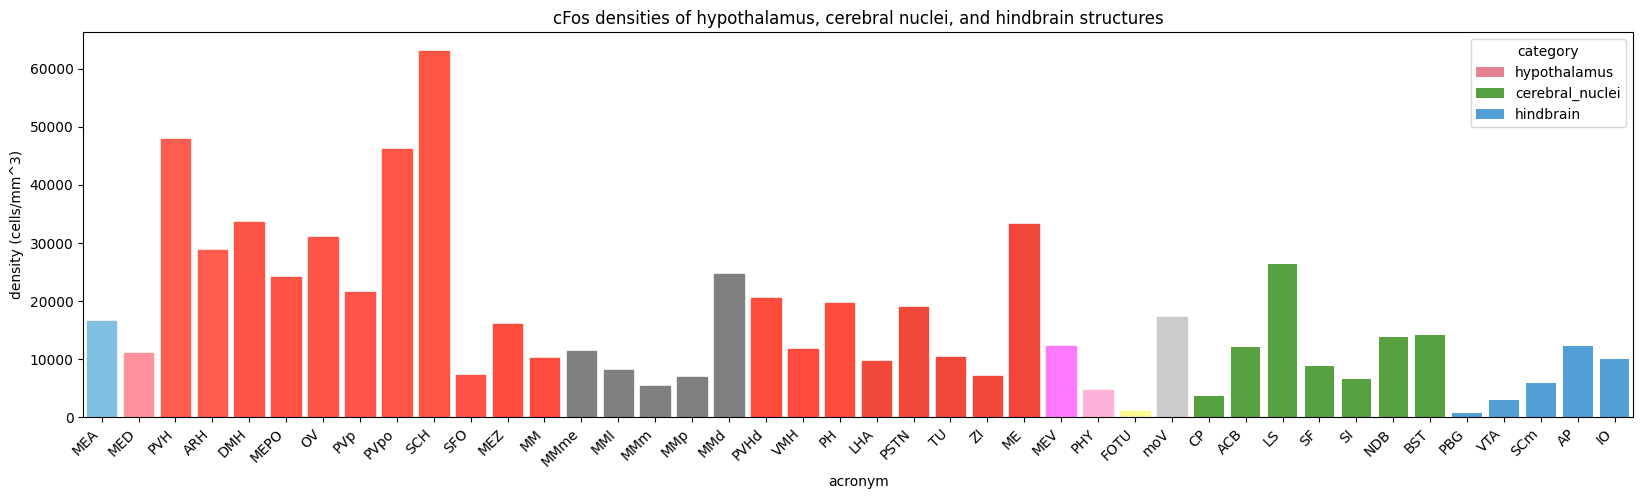

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame named 'data'
data = pd.read_csv("Female1_restraint_Fos_output.csv")

# Filter the right side of the brain
right_df = data[data['acronym'].str.endswith('-R')]

# Remove the '-R' from the acronym column in the right DataFrame
right_df['acronym'] = right_df['acronym'].str.replace('-R', '')

# List of structures of interest for the hypothalamus and cerebral nuclei
hypothalamus_structures = ['ARH', 'DMH', 'LHA', 'LPOE', 'ME', 'MEPO', 'MM', 'OV', 'PH', 'PSTN', 'PVH', 'PVp', 'SCH', 'SFO', 'TU', 'VMH', 'ZI']
cerebral_nuclei_structures = ['ACB', 'BST', 'CeA', 'LS', 'SF', 'GP', 'CP', 'NDB', 'SI']
hindbrain_structures = ['AP', 'IO', 'LRt', 'PBG', 'PnO', 'RMC', 'RtTg', 'SCm', 'SNC', 'VTA']

# Filter the right DataFrame for the structures of interest
right_hypothalamus = right_df[right_df['acronym'].str.contains('|'.join(hypothalamus_structures), case=False)]
right_cerebral_nuclei = right_df[right_df['acronym'].isin(cerebral_nuclei_structures)]
right_hindbrain = right_df[right_df['acronym'].isin(hindbrain_structures)]

# Add a new column to each DataFrame to identify the category (hypothalamus or cerebral nuclei)
right_hypothalamus['category'] = 'hypothalamus'
right_cerebral_nuclei['category'] = 'cerebral_nuclei'
right_hindbrain['category'] = 'hindbrain'

# Concatenate the two DataFrames
combined_data = pd.concat([right_hypothalamus, right_cerebral_nuclei])

combined_data = pd.concat([right_hypothalamus, right_cerebral_nuclei, right_hindbrain])

def hex_to_rgb(hex_color):
    return tuple(int(hex_color[i:i+2], 16) / 255 for i in (0, 2, 4))

inverted_dict_rgb = {k: hex_to_rgb(v) for k, v in inverted_dict.items()}

def custom_color(acronym):
    return inverted_dict_rgb.get(acronym, 'gray')


combined_data['color'] = combined_data['acronym'].apply(custom_color)

plt.figure(figsize=(20, 5))
ax = sns.barplot(x='acronym', y='density (cells/mm^3)', data=combined_data, hue='category', palette='husl', dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Apply custom colors to the bars
bars = ax.containers[0]
for i, bar in enumerate(bars):
    row = combined_data.iloc[i]
    bar.set_color(row['color'])

plt.title('cFos densities of hypothalamus, cerebral nuclei, and hindbrain structures')
plt.show()



